### Notebook for extracting the most used AI techniques, AI usecases and Summaries from the datasets available on the [sam.gov](https://sam.gov/) website.
####  This notebook performs clustering to group the 156 contracts into 20 clusters, and then summarizes the combined text from each cluster using llama3 model. Finally, it performs topic labeling using the llama3 model.
#### Files needed to run the notebook:
    -- 'AI_contracts.csv'
#### Files generated from the notebook:
    -- 'summaries_of_AI_contracts_usecases.csv'
    -- 'AI_contracts_ai_use_case_topics.csv'

#### Loading the AI contracts dataset `AI_contracts.csv` obtained from sam.gov 

In [1]:
import pandas as pd
df_AI_contracts=pd.read_csv('AI_contracts.csv', index_col='Unnamed: 0')

df_AI_contracts=df_AI_contracts[['Title', 'Sol#', 'Department/Ind.Agency', 'AwardNumber', 'AwardDate', 'PostedDate', 'Award$', 'Awardee', 'Link', 'Description']]
df_AI_contracts

,Title,Sol#,Department/Ind.Agency,AwardNumber,AwardDate,PostedDate,Award$,Awardee,Link,Description
2,Maestro Pro Assay System Purchase,75N95024Q00304,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",NaN,NaN,2024-05-21,NaN,NaN,https://sam.gov/opp/754bb52525fe47ec981a96f85e...,SAM.gov SOURCES SOUGHT NOTICE Solicitation Num...
34,99--DOI-BLM Automated Closeout Robotic Process...,DOILFBO240043,"INTERIOR, DEPARTMENT OF THE",NaN,NaN,2024-05-21,NaN,NaN,https://sam.gov/opp/8babf5bc741343bcb9111b5dd4...,The Bureau of Land Management intends to utili...
523,6515--Orthopedic Surgical Robotic Systems (VA-...,36C10G24R0012,"VETERANS AFFAIRS, DEPARTMENT OF",NaN,NaN,2024-05-21,NaN,null,https://sam.gov/opp/8fec4ecf4eca4f368af94720ce...,Number: 36C10G24R0012 Notice Type: Combined Sy...
828,6530--ME-ScriptPro Robot SP 200 CCC 12 SLOT CS...,36C26024Q0556,"VETERANS AFFAIRS, DEPARTMENT OF",NaN,NaN,2024-05-21,NaN,null,https://sam.gov/opp/6062ec612f7d4401acec7fd34e...,Robotic Prescription Dispensing System
836,6525-- Xenon UV Robot,36C26224Q1094,"VETERANS AFFAIRS, DEPARTMENT OF",NaN,NaN,2024-05-21,NaN,null,https://sam.gov/opp/75d2573ba5f14b5cb430c5667a...,Combined Synopsis/Solicitation Notice Combined...
...,...,...,...,...,...,...,...,...,...,...
67742,A--SBIR Phase II Proposal #B20P2-1F01. Early d...,68HERC20R0162,ENVIRONMENTAL PROTECTION AGENCY,68HERC21C0045,2021-03-23,2021-03-23,396192.0,AquaRealTime LLC 2201 Pearl St Apt 317 Boulder...,https://sam.gov/opp/9867adf55b654346a3117f8d9e...,SBIR Phase II Proposal #B20P2-1F01. Early dete...
68014,A--SBIR Phase I Proposal #B205C-0003.Procuring...,68HERC20R0111,ENVIRONMENTAL PROTECTION AGENCY,68HERC21C0028,2021-02-18,2021-02-18,99999.0,Farm to Flame Energy Inc. 78 John Miller Way M...,https://sam.gov/opp/a8890434598f4255add028fa92...,SBIR Phase I Proposal #B205C-0003.Procuring Un...
68563,TECHNOLOGY TRANSFER OPPORTUNITY: Lunar Surface...,T2P-LaRC-00065,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,NaN,NaN,2020-11-30,NaN,NaN,https://sam.gov/opp/a85ac57685f84a2caba0fa37ef...,NASA’s Technology Transfer Program solicits in...
69836,"OASIS SB Pools 1, 3, & 4 On-Ramp",GS00Q13DR0002P1P3P4,GENERAL SERVICES ADMINISTRATION,NaN,NaN,2020-05-26,NaN,NaN,https://sam.gov/opp/60a3e639074e463ca1afa73e51...,OASIS SB Pool 4 Awardees and Apparent Successf...


#### Clustering the similar use cases followed by preprocessing the summaries of the use cases

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# # Download necessary NLTK packages for tokenization and stopwords
# nltk.download('punkt')
# nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing
df_AI_contracts['Description'] =df_AI_contracts['Description'].astype(str)

df_AI_contracts['Processed_Description'] = df_AI_contracts['Description'].apply(preprocess_text)
# Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_AI_contracts['Processed_Description'])

# Similarity Calculation
similarity_matrix = cosine_similarity(tfidf_matrix)

num_clusters = 20  
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_

# Assign clusters back to the DataFrame
df_AI_contracts['Cluster'] = clusters

#### Plotting Elbow plot

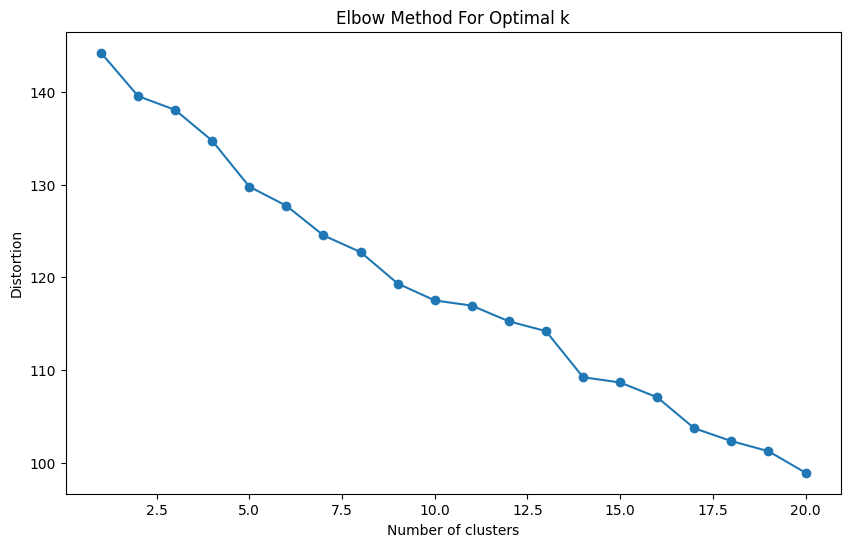

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to calculate the distortions for different numbers of clusters
def calculate_distortions(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    return distortions

distortions = calculate_distortions(tfidf_matrix, num_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_clusters+1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


#### Print contents of the clusters


In [5]:
def print_cluster_contents(cluster_id, num_samples=5):
    print(f"\nCluster - {cluster_id}:")
    cluster_data = df_AI_contracts[df_AI_contracts['Cluster'] == cluster_id]['Description']
    actual_samples = min(len(cluster_data), num_samples)
    samples = cluster_data.sample(n=actual_samples, random_state=1)
    for i, sample in enumerate(samples, 1):
        print(f"Sample {i}: {sample}")

num_clusters = df_AI_contracts['Cluster'].nunique()  
for i in range(min(num_clusters, num_clusters)):  
    print_cluster_contents(i)


Cluster - 0:
Sample 1: Request for Information (RFI) Instructions  RFI No. 2022-10-07-MARTIN  Design, Build, Integrate and Deliver an Automated Platform for Soil Extractions and Analyses  Battelle Contact Information:   Laurie Martin, Acquisition Lead Specialist  Battelle Memorial Institute, Pacific Northwest Division, operating the Pacific Northwest National Laboratory for the U.S. Department of Energy (DOE)  Phone: (509) 372-4071  Email: laurie.martin@pnnl.gov   Instructions to Respondents  Respondents should provide the following information in their response to this RFI:  Business Response  Company Name/Division?  Business/Administrative point-of-contact name, title, telephone, and email address  Technical point-of-contact name, title, telephone, and email address?  Small business qualification status  Country where business is owned and operated?  General approach for contracting for product design.  Technical Response  General Information  Battelle requests respondents provide t

#### Concatinating the summaries in each cluster

In [6]:
clustered_texts = df_AI_contracts.groupby('Cluster')['Description'].apply(' '.join)
pd.set_option('display.max_colwidth', 2000)
print(clustered_texts)

Cluster
0     Request for Information (RFI) Instructions  RFI No. 2022-10-07-MARTIN  Design, Build, Integrate and Deliver an Automated Platform for Soil Extractions and Analyses  Battelle Contact Information:   Laurie Martin, Acquisition Lead Specialist  Battelle Memorial Institute, Pacific Northwest Division, operating the Pacific Northwest National Laboratory for the U.S. Department of Energy (DOE)  Phone: (509) 372-4071  Email: laurie.martin@pnnl.gov   Instructions to Respondents  Respondents should provide the following information in their response to this RFI:  Business Response  Company Name/Division?  Business/Administrative point-of-contact name, title, telephone, and email address  Technical point-of-contact name, title, telephone, and email address?  Small business qualification status  Country where business is owned and operated?  General approach for contracting for product design.  Technical Response  General Information  Battelle requests respondents provide the followi

#### Summary generation by the llama3 model using ollama api

In [7]:
import ollama
def gen_summaries_llama3(text: str):
    response = ollama.chat(model='llama3', messages=[
        {"role" : "system", "content" : "You are a Summary generator. Generate a summary from the provided text."},
        {"role" : "user", "content" : "Convert the following text into a summary of the form 'Summary: <summary>':"},
        {"role" : "user",  "content" : text}
    ])
    title = response['message']['content']
    return title

#### Summary generation by the llama3 model using ollama api

In [8]:
abstractive_summaries_llama3 = clustered_texts.apply(lambda x: gen_summaries_llama3(x))
print(abstractive_summaries_llama3)

Cluster
0     Here is a summary of the Request for Information (RFI) document:\n\nBattelle Memorial Institute, Pacific Northwest Division, is seeking information from potential respondents to design, build, integrate, and deliver an automated platform for soil extractions and analyses. The goal is to identify companies with expertise in custom engineered devices, robotic access, and software integration.\n\nThe RFI requires respondents to provide general information about their company, technical point-of-contact, and relevant experience with designing and building custom engineered devices for sieving, weighing, and aliquoting solids/powders, as well as integrating devices to create a desired workflow. Respondents should also describe their availability and capacity to conduct design/build/deliver activities in the April 2023-April 2024 time-frame.\n\nAdditionally, Battelle requests that respondents provide information on common electrical, air, cooling, and plumbing needs for systems

#### Saving the clustered text, summaries by llama3 models to a csv file


In [10]:
df_summariesAI_contracts = pd.concat([clustered_texts, abstractive_summaries_llama3], axis=1)
df_summariesAI_contracts.columns=['clustered_summaries','llama3_summaries']
df_summariesAI_contracts.to_csv('summaries_of_AI_contracts_usecases.csv')

#### Function to identify the topics using llama3 model using ollama API

In [11]:
import ollama

def gen_topic_llama3(text: str):
    response = ollama.chat(model='llama3', messages=[
        {"role" : "system", "content" : "You are a topic labeller, I want you to identiy the topic for given text from the list of topics given below?, note just give me the topic name and limit your answer to two tokens"},
        {"role" : "user", "content" : """
                                        Topics:
                                    	1.	Accessibility: using AI for translation / interpretation, section 508 compliance, plain language, or other activities to increase accessibility of documents and interactions with the government
	                                    2.	Policy-making and public engagement: use of AI in any stage of developing regulations or gathering input
                                        3.	Asset management: use of AI to manage both physical and digital assets
                                        4.	Hotlines and service desks: use of AI to triage, respond, and refer to calls, texts, emails
                                        5.	Service / benefits access: use of AI to support determining eligibility for services, streamlining applications, etc.
                                        6.	Program integrity: use of AI to detect potential fraud or other wrong-doing in use of public benefits and services
                                        7.	Case management: use of AI to document and summarize interactions, suggest and enable referrals
                                        8.	Service delivery: use of AI to provide direct services either to the public or to state/local/tribal/territorial governments 
                                        9.	People operations: use of AI for purposes related to recruiting, retaining, and off-boarding employees
                                        10.	Internal operations: administrative use cases for AI, e.g. notetaking, virtual assistants
                                        11.	Other
                                    Identify the topic the text belongs to '<topic_name>':"""},
        {"role" : "user",  "content" : text}
    ])
    Topic = response['message']['content']
    return Topic

#### Applying function on the Description column to identify the topics using llama3 model 

In [12]:
df_AI_contracts['topics']=df_AI_contracts['Description'].apply(lambda x:  gen_topic_llama3(x))

In [13]:
df_AI_contracts.head(10)

,Title,Sol#,Department/Ind.Agency,AwardNumber,AwardDate,PostedDate,Award$,Awardee,Link,Description,Processed_Description,Cluster,topics
2,Maestro Pro Assay System Purchase,75N95024Q00304,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",NaN,NaN,2024-05-21,NaN,NaN,https://sam.gov/opp/754bb52525fe47ec981a96f85e02b2a2/view,"SAM.gov SOURCES SOUGHT NOTICE Solicitation Number: 75N95024Q00304 Title: Maestro Pro Assay System Purchase Classification Code: 6640 NAICS Code: 334516 Description: Analytical Laboratory Instrument Manufacturing This is a Sources Sought Notice. This is NOT a solicitation for proposals, proposal abstracts, or quotations. The purpose of this notice is to obtain information regarding the availability and capability of all qualified sources to perform a potential requirement. This notice is issued to help determine the availability of qualified companies technically capable of meeting the Government requirement and to determine the method of acquisition. It is not to be construed as a commitment by the Government to issue a solicitation or ultimately award a contract. Responses will not be considered as proposals or quotes. No award will be made as a result of this notice. The Government will NOT be responsible for any costs incurred by the respondents to this notice. This notice is strictly for research and information purposes only. Background: The National Institute on Aging (NIA), one of the 27 Institutes and Centers of NIH, leads a broad scientific effort to understand the nature of aging and to extend the healthy, active years of life. The Intramural Research Program (IRP) of the National Institute on Aging (NIA) provides a stimulating setting for a comprehensive effort to understand aging through multidisciplinary investigator-initiated research, in this regard. The Laboratory of Neurogenetics (LNG) is a highly collaborative research group that investigates the basis of neurodegenerative diseases using genetics, genomics, cell biology, disease modeling, and computational approaches. The LNG comprises 5 principal investigator led research groups. These include the Molecular Genetics Section, the Cell Biology and Gene Expression Section, the Transgenics Section, the Neuromuscular Disease Research Section, and the Neurodegenerative Disease Research ...",sources sought notice solicitation number title maestro pro assay system purchase classification code naics code description analytical laboratory instrument manufacturing sources sought notice solicitation proposals proposal abstracts quotations purpose notice obtain information regarding availability capability qualified sources perform potential requirement notice issued help determine availability qualified companies technically capable meeting government requirement determine method acquisition construed commitment government issue solicitation ultimately award contract responses considered proposals quotes award made result notice government responsible costs incurred respondents notice notice strictly research information purposes background national institute aging nia one institutes centers nih leads broad scientific effort understand nature aging extend healthy active years life intramural research program irp national institute aging nia provides stimulating setting comprehensive effort understand aging multidisciplinary research regard laboratory neurogenetics lng highly collaborative research group investigates basis neurodegenerative diseases using genetics genomics cell biology disease modeling computational approaches lng comprises principal investigator led research groups include molecular genetics section cell biology gene expression section transgenics section neuromuscular disease research section neurodegenerative disease research unit supporting mission enabling collaborative state art research computational biology group genomics technology group data science group lng tremendous impact understanding neurodegenerative diseases since inception d

In [14]:
# saving the topics "AI_contracts" file obtained from  sam.gov  to the csv file
df_AI_contracts.to_csv('AI_contracts_ai_use_case_topics.csv')